## Utforskning av datasetet Housing.csv
I denna notebooken kommer jag utforska grunderna i datasetet och ta med mig det mest aktuella som jag vill använda i [Laboration_Statistika_Metoder.ipynb](Laboration_Statistika_Metoder.ipynb)

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from linear_regression import LinearRegression

pd.set_option('display.max_rows', None)

path = "data/"
df = pd.read_csv(path + "housing.csv")

model = LinearRegression()

Först tar jag in datasetet med hjälp av pandas och tittar först på .head() och där kan vi se att alla columner är numeriska och är bara `ocean_proximity` innehåller kategorisk data.

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


I datan kan

In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


I `.info()` får vi fram att Non-null inte ser så bra ut på `total_bedrooms` den skiljer sig från övriga värden 20433 av 20640.

In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

För att avgöra ifall detta har en avgörande effekt skapa jag en modell som heter `missing_percentage` som avgöra hur många procent som saknas.

In [12]:
model.missing_percentage(df)


Columns with missing data:
total_bedrooms : 207 (1.003%)


In [13]:
print(df['total_bedrooms'].median())

435.0


In [14]:
total_bedroomsNaN = df[(df["total_bedrooms"].isna())]
print(total_bedroomsNaN[["total_bedrooms", "total_rooms", "ocean_proximity"]])

       total_bedrooms  total_rooms ocean_proximity
182               NaN       1784.0       <1H OCEAN
327               NaN       3393.0          INLAND
366               NaN       1819.0      NEAR OCEAN
477               NaN       2346.0          INLAND
495               NaN        812.0          INLAND
504               NaN       1335.0       <1H OCEAN
1009              NaN        421.0          INLAND
1271              NaN       1610.0       <1H OCEAN
1343              NaN        576.0          INLAND
1441              NaN       4497.0      NEAR OCEAN
1583              NaN       2559.0       <1H OCEAN
1835              NaN       2287.0       <1H OCEAN
1891              NaN       1072.0          INLAND
1918              NaN       2024.0      NEAR OCEAN
1984              NaN        154.0          INLAND
2107              NaN        771.0      NEAR OCEAN
2111              NaN       2035.0      NEAR OCEAN
2186              NaN       3051.0       <1H OCEAN
2348              NaN       231

In [15]:
total_bedroomsNaN.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,207.000000,207.000000,207.000000,207.000000,0.0,207.000000,207.000000,207.000000,207.000000
mean,-119.472560,35.497633,29.270531,2562.603865,NaN,1477.772947,510.024155,3.822244,206007.280193
std,2.001424,2.097298,11.964927,1787.269789,NaN,1057.448212,386.120704,1.955595,111638.214545
min,-124.130000,32.660000,4.000000,154.000000,NaN,37.000000,16.000000,0.852700,45800.000000
25%,-121.810000,33.970000,19.000000,1307.500000,NaN,781.000000,258.000000,2.564150,128750.000000
50%,-118.490000,34.200000,30.000000,2155.000000,NaN,1217.000000,427.000000,3.411500,175000.000000
75%,-117.985000,37.495000,38.000000,3465.000000,NaN,1889.500000,628.000000,4.615750,267700.000000
max,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000


Det är drygt bara en procent som saknas i `total_bedrooms` , om man jämför hela datasetet. Det skulle inte påverka datasetet allt för mycket om jag bara tog bort allt, då det är mindre än 5 procent av datan som saknas. Vi hade kunnat ta mean eller median av värdet men då kan det ge ett felaktigt värde för har vi som man kan se ovan, så finns det fastigheter med minst 154 rum och upptill max 11709 rum, att ta median och sätta 435 sovrum blir lite galet. Speciellt på de fastigheter som bara har 154 rum. För att lösa detta skall jag ta ration och ration median av `total_bedrooms` och `total_rooms`. Jag väljer att exludera missing values från denna uträkningen.

In [16]:
df_no_na = df.dropna(subset=["total_bedrooms"])

ratio = df_no_na["total_bedrooms"] / df_no_na["total_rooms"]
median_ratio = ratio.median()
print(median_ratio)

0.20316243411595591


In [17]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(median_ratio * df["total_rooms"])

In [18]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

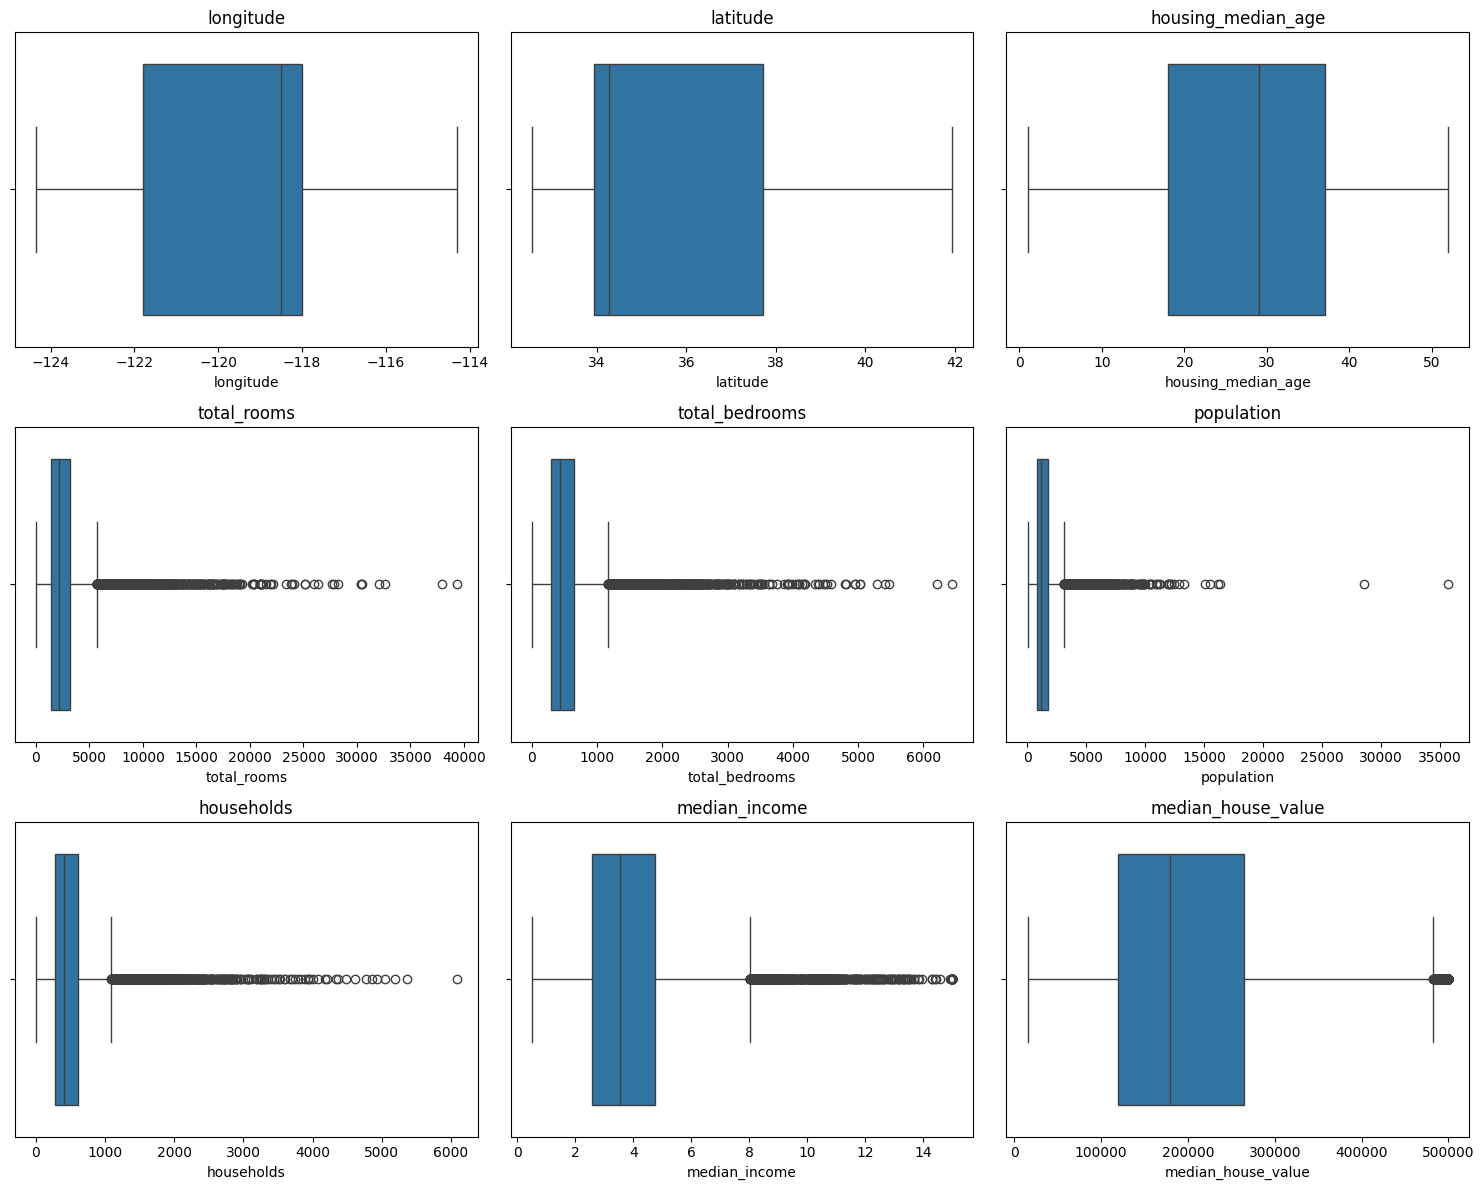

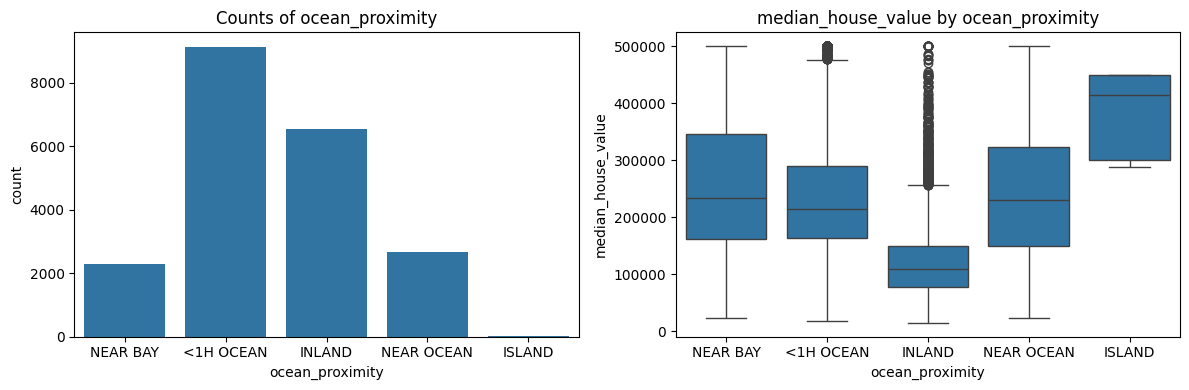

In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
n = len(num_cols)
cols = 3
rows = int(np.ceil(n / cols))
plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col], orient='h')
    plt.title(col)
plt.tight_layout()
plt.show()


cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
for cat in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.countplot(x=cat, data=df, ax=axes[0])
    axes[0].set_title(f'Counts of {cat}')
    sns.boxplot(x=cat, y='median_house_value', data=df, ax=axes[1])
    axes[1].set_title(f'median_house_value by {cat}')
    plt.tight_layout()
    plt.show()

Låt oss utforska datan lite mer och se vilka unika värden de numeriska värdena ha.

In [20]:
print(df[["median_house_value"]].value_counts())

median_house_value
500001.0              965
137500.0              122
162500.0              117
112500.0              103
187500.0               93
225000.0               92
350000.0               79
87500.0                78
275000.0               65
150000.0               64
175000.0               63
100000.0               62
125000.0               56
67500.0                55
250000.0               47
200000.0               46
118800.0               39
450000.0               37
156300.0               35
212500.0               33
193800.0               31
181300.0               31
75000.0                30
300000.0               30
93800.0                29
81300.0                29
55000.0                29
106300.0               28
143800.0               28
500000.0               27
400000.0               27
237500.0               26
262500.0               25
170800.0               25
166700.0               23
131300.0               22
375000.0               22
325000.0           

För att analysera hur många procent av datan som är över 500001 $  och hur mycket det påverkar datasetet.

In [21]:
percentage = 965 / 20639 * 100
print(f"{percentage:.2f}%")

4.68%


In [22]:
print(df[["ocean_proximity"]].value_counts())

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64


In [23]:
print(df[["median_house_value", "ocean_proximity"]].value_counts())

median_house_value  ocean_proximity
500001.0            <1H OCEAN          532
                    NEAR OCEAN         212
                    NEAR BAY           194
162500.0            <1H OCEAN           55
112500.0            INLAND              52
187500.0            <1H OCEAN           48
87500.0             INLAND              47
137500.0            INLAND              47
                    <1H OCEAN           45
225000.0            <1H OCEAN           43
350000.0            <1H OCEAN           43
67500.0             INLAND              34
162500.0            INLAND              33
175000.0            <1H OCEAN           33
275000.0            <1H OCEAN           30
100000.0            INLAND              30
150000.0            <1H OCEAN           28
112500.0            <1H OCEAN           27
500001.0            INLAND              27
200000.0            <1H OCEAN           25
125000.0            INLAND              24
81300.0             INLAND              23
181300.0          

In [24]:
print(df[df["median_house_value"] < 500001].describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  19675.000000  19675.000000        19675.000000  19675.000000   
mean    -119.563192     35.651780           28.386277   2619.763659   
std        2.006108      2.149802           12.509113   2181.348207   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.760000     33.930000           18.000000   1438.000000   
50%     -118.500000     34.270000           28.000000   2111.000000   
75%     -117.990000     37.730000           37.000000   3120.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    19675.000000  19675.000000  19675.000000   19675.000000   
mean       539.424151   1440.812198    501.186023       3.676717   
std        421.874160   1143.648725    383.264636       1.570272   
min          2.000000      3.000000      2.000000       0.499900   
25%        297.00000

In [25]:
print(df.duplicated().sum())

0


Efter nu att ha analyzerat datan lite till kan vi se att delvis innehåller inte datasetet inga dubbletter. Men det som jag tyckte var mest intressant är att det var så många fastigheter med ett median på 500001. Detta kan vara för att priserna är väldigt sprida över den gränsen. Antalet av sådana fall att medianen var 500001 $ så var det 4,68 % som påverkar datasetet. Jag tar då beslutet att ta bort dennna datan då den påverkar inte datasetet så mycket och förhoppnings ge en bättre spridning i datan.

In [26]:
df = df[df["median_house_value"] < 500001]

Nu har vi ersatt data och förberett datasetet ännu mer. Så nästa steg är att omvandla `ocean_proximity` till numerisk data. Detta tar jag hjälp av Pandas funktion `.getdummies` . Så att vi skall kunna ta med numerisk data i vår analys.

In [27]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True, dtype=int)

Låt oss utforska correlationen i en heatmap

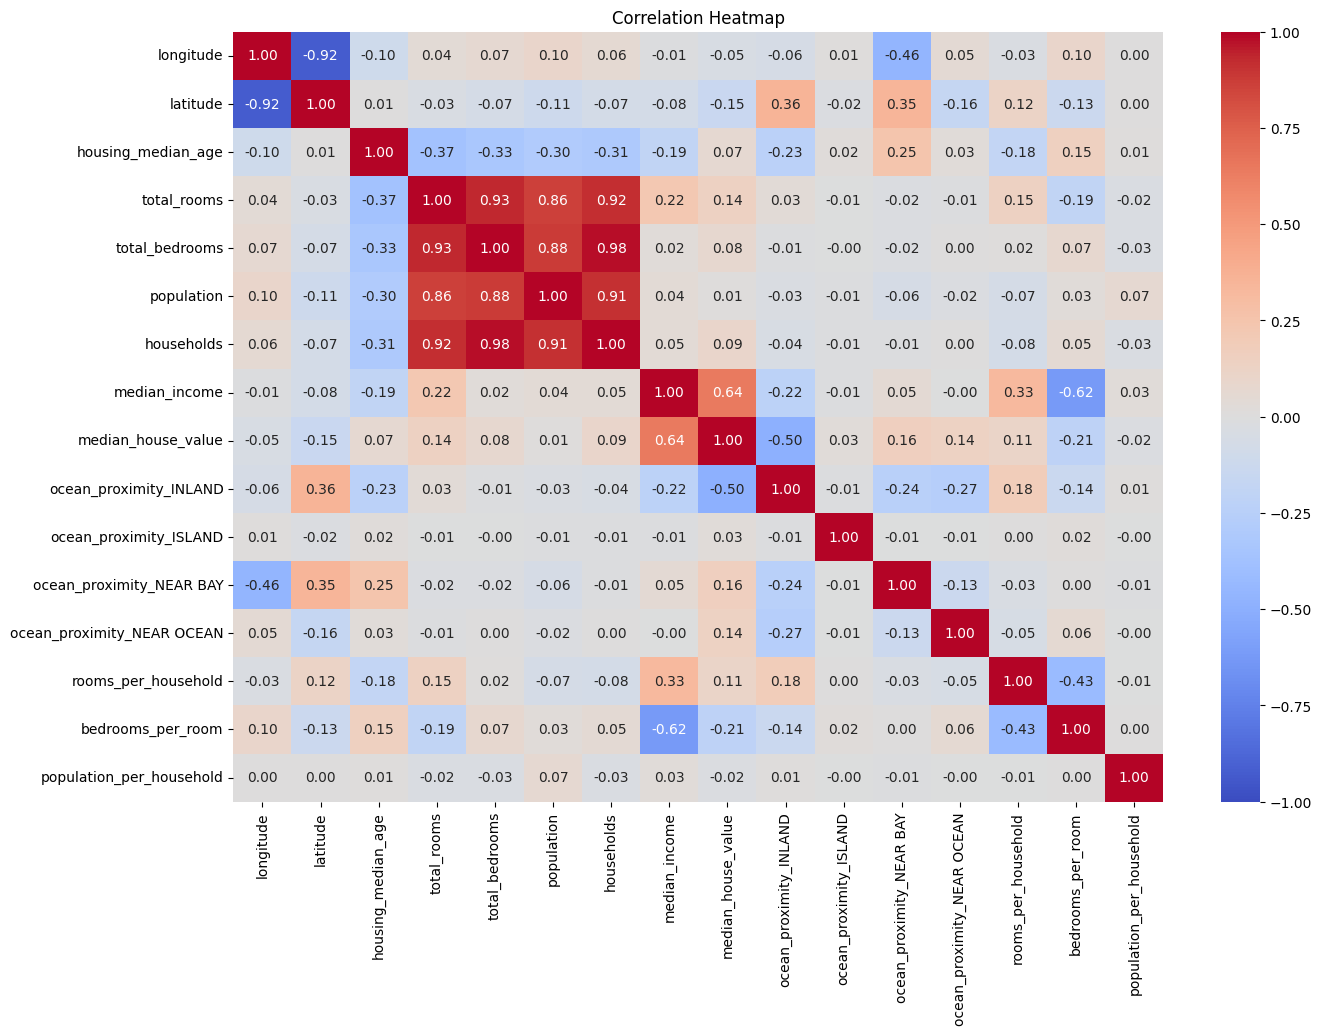

In [39]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Som vi kan se så har kordinaterna en korrelation men det är mest positioner. Att totala rum och sovrum har en stark korrelation med populationen och hushåll det finns är inte heller något shockande. Då beroende på hur många människor i ett område kan de behövas ett visst antal hushåll som har ett visst antal rum och sovrum. För att detta inte skall bli fel i datan kommer jag skapa en ny variable som ger rum per antal hushåll, sovrum per antal totala rum och antal hushåll i populationen för att kunna ge en mer rättvis bild. 

In [40]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

bedrooms_median_ratio = df["bedrooms_per_room"].median()
rooms_median_ratio = df["rooms_per_household"].median()
population_median_ratio = df["population_per_household"].median()
print(bedrooms_median_ratio)
print(rooms_median_ratio)
print(population_median_ratio)

0.20402498265093685
5.184322033898305
2.8371335504885993


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR BAY'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>,
        <Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'bedrooms_per_room'}>,
        <Axes: title={'center': 'population_per_household'}>]],
      dtype=object)

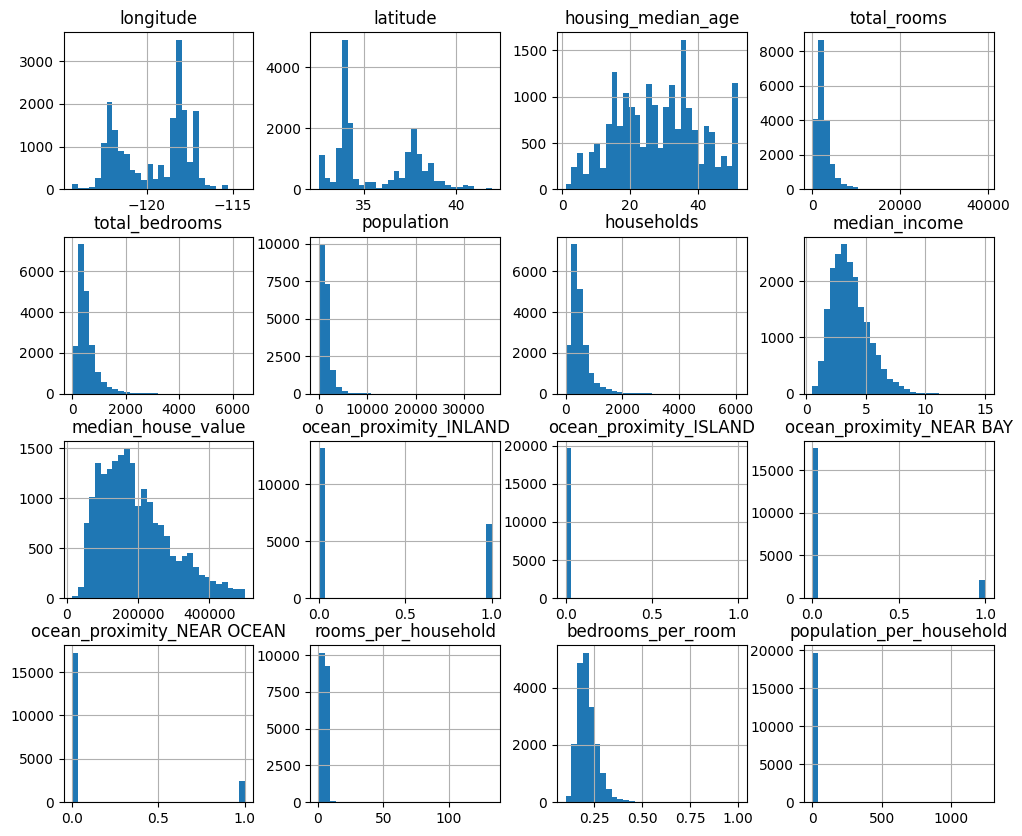

In [41]:
df.hist(figsize=(12, 10), bins=30)

Låt oss gå vidare till [Laboration_Statistika_Metoder.ipynb](Laboration_Statistika_Metoder.ipynb) och färdigställ analysen och använda [linear_regression.py](linear_regression.py).